<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [2]:
# Install the necessary libraries
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [3]:
# Load the dataset from the given URL
#file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
#I prefer to download the dataset on my local machine so that I do not have to wait for it to download each time I run the code.
import os


file_url = os.path.join(os.getcwd(), "survey_data.csv")
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


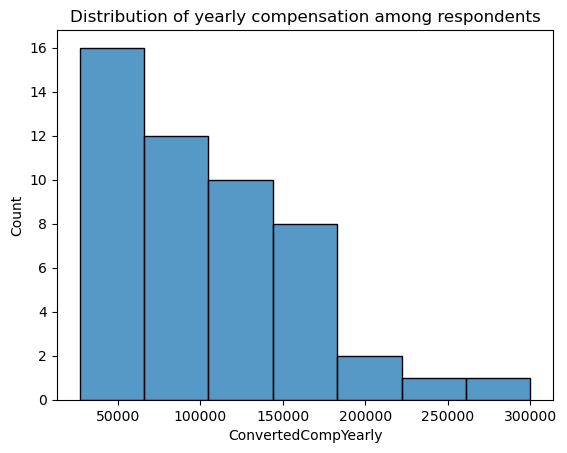

In [4]:
## Write your code here
df["ConvertedCompYearly"] = df["ConvertedCompYearly"].dropna()

data = df["ConvertedCompYearly"].value_counts().to_frame().reset_index()[:50]

sns.histplot(data = data, x = "ConvertedCompYearly")
plt.title("Distribution of yearly compensation among respondents")
plt.show()



<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [5]:
## Write your code here
df_mod = df.assign(Employment = df["Employment"].str.split(";").explode("Employment"))
df_relationship = df_mod[["Employment","CompTotal"]].dropna()

data = df_relationship.groupby("Employment")["CompTotal"].median()

mean_comp = data.loc["Employed, full-time"]

print(f"The mean compensation for 'Employed, full-time' is {mean_comp}")

The mean compensation for 'Employed, full-time' is 109000.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [6]:
data = df[["Country","ConvertedCompYearly"]].dropna().copy()

data["ConvertedCompYearly"] = (df["ConvertedCompYearly"] - df["ConvertedCompYearly"].min()) / (df["ConvertedCompYearly"].max() - df["ConvertedCompYearly"].min())

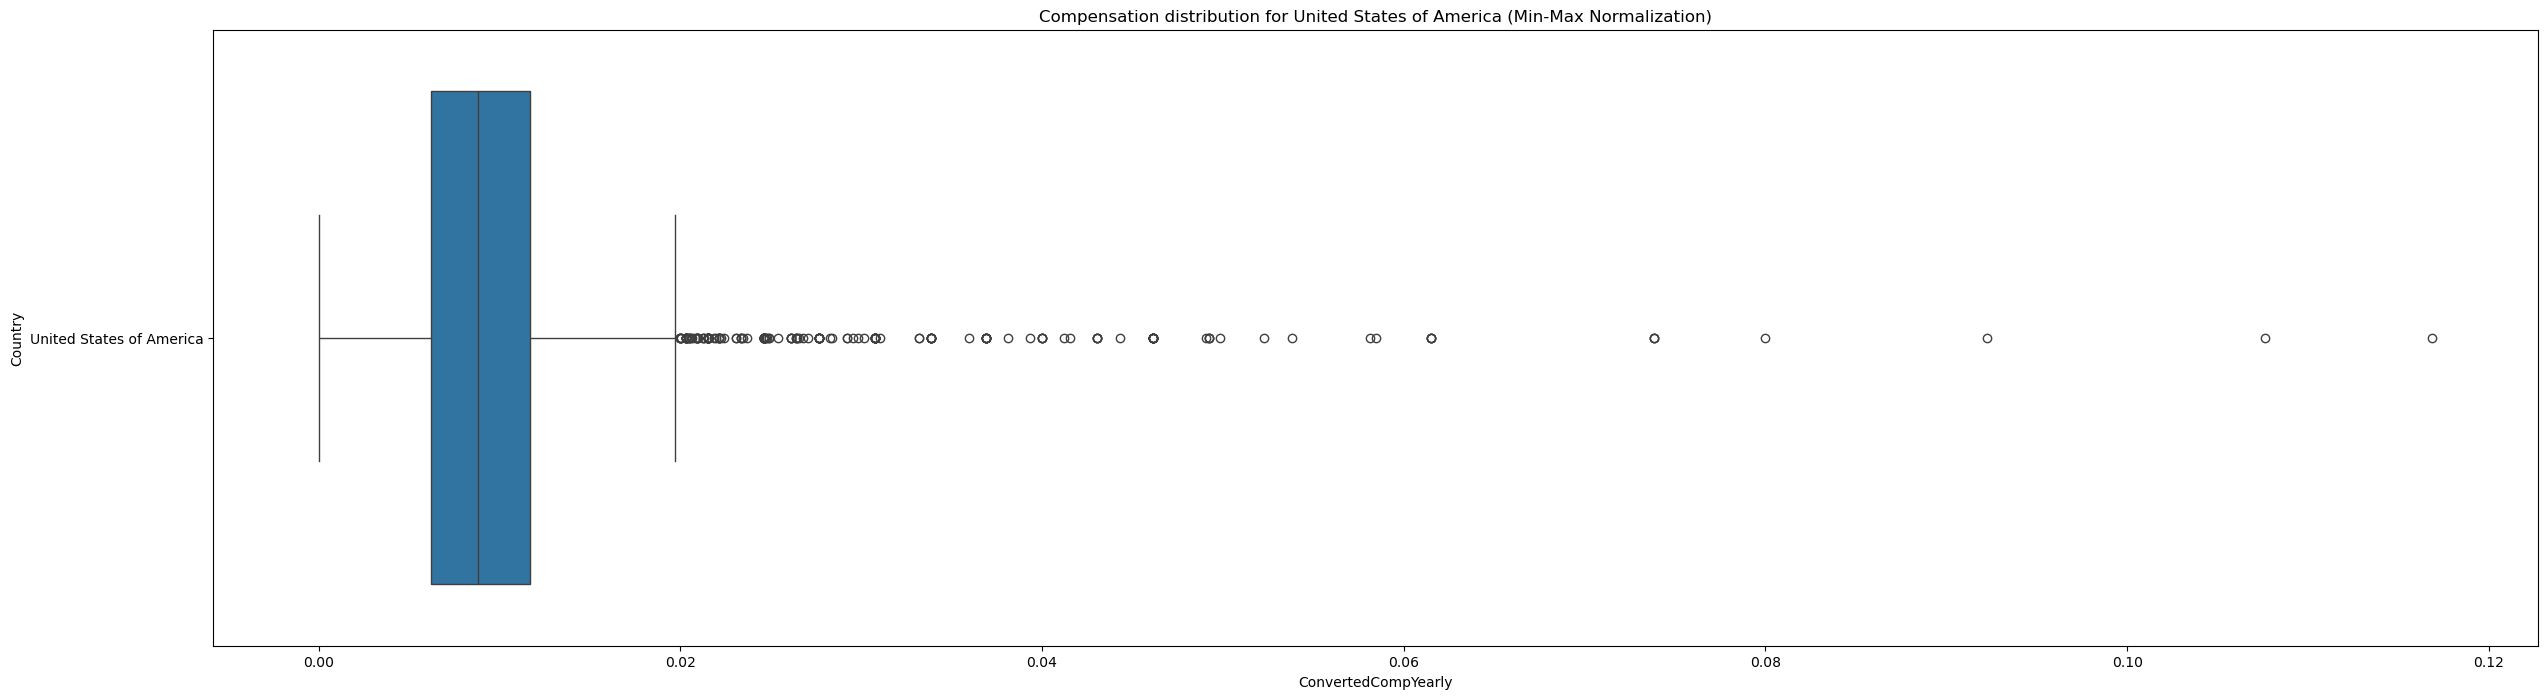

In [7]:
## Write your code here


country = "United States of America"
data = data[data["Country"] == country]

plt.figure(figsize = (30,8))
#plt.xlim(0,0.0175)
sns.boxplot(data = data, y = "Country", x = "ConvertedCompYearly")
plt.title(f"Compensation distribution for {country} (Min-Max Normalization)")
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [8]:
## Write your code here
quartile_1 = df["ConvertedCompYearly"].describe()["25%"]
quartile_3 = df["ConvertedCompYearly"].describe()["75%"]

IQR = quartile_3 - quartile_1

upper_bounds = quartile_3 + 1.5 * IQR
lower_bounds = quartile_1 - 1.5 * IQR

#There are no outliers below the lower_bounds, only above the upper_bounds
outliers = df[df["ConvertedCompYearly"] > lower_bounds]

df_no_oulier = df.drop(outliers.index.tolist())
df_no_oulier


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


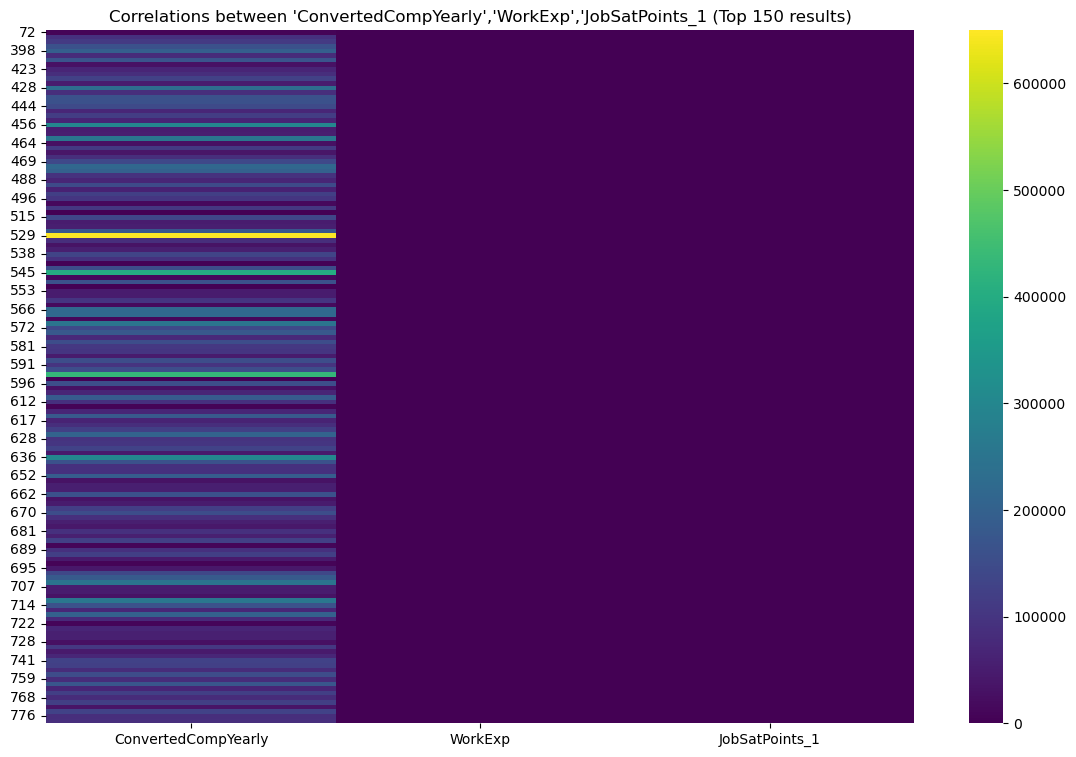

In [10]:
## Write your code here
data = df[["ConvertedCompYearly","WorkExp","JobSatPoints_1"]].dropna()[:150]

plt.figure(figsize = (14,9))
plt.title("Correlations between 'ConvertedCompYearly','WorkExp','JobSatPoints_1 (Top 150 results)")
sns.heatmap(data = data, cmap = "viridis")
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


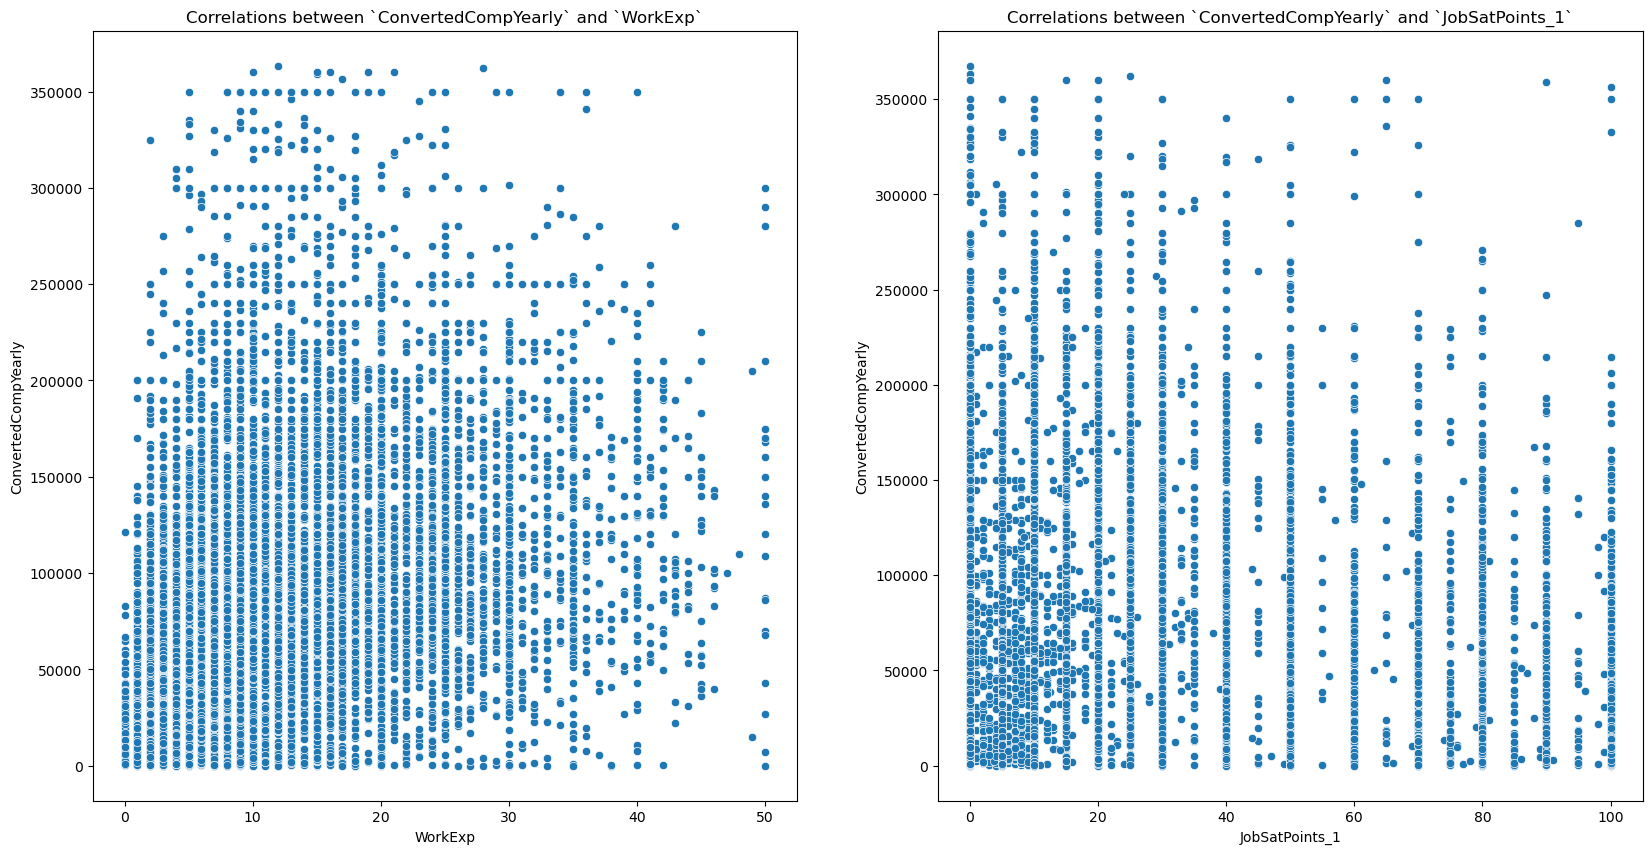

In [ ]:
## Write your code here
scatter_data_1 = df[["ConvertedCompYearly","WorkExp"]].dropna()
scatter_data_2 = df[["ConvertedCompYearly","JobSatPoints_1"]].dropna()

#Removing extreme outliers (Top 1%)
scatter_data_1 = scatter_data_1[scatter_data_1["ConvertedCompYearly"] < scatter_data_1["ConvertedCompYearly"].quantile(0.99)]
scatter_data_2 = scatter_data_2[scatter_data_2["ConvertedCompYearly"] < scatter_data_2["ConvertedCompYearly"].quantile(0.99)]

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title("Correlations between `ConvertedCompYearly` and `WorkExp`")
sns.scatterplot(data = scatter_data_1, x = "WorkExp", y = "ConvertedCompYearly")

plt.subplot(1,2,2)
plt.title("Correlations between `ConvertedCompYearly` and `JobSatPoints_1`")
sns.scatterplot(data = scatter_data_2, x = "JobSatPoints_1", y = "ConvertedCompYearly")
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
